# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Пример объемам закупок авокадо

In [17]:
df = pd.read_csv('avocado.csv')
df.rename(columns={'Total Bags': 'Total_Bags',
                   'Small Bags': 'Small_Bags',
                   'Large Bags': 'Large_Bags',
                   'XLarge Bags': 'XLarge_Bags',
                   'Total Volume': 'Total_Volume'}, inplace=True)

In [18]:
AveragePrice = df[[x for x in df.columns if 'Bags' in x] + ['year']].groupby('year').sum()
pd.options.display.float_format = '{:,.0f}'.format
AveragePrice

,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
year,,,,
2015,"772,192,237","634,682,705","132,066,400","5,443,128"
2016,"1,463,158,867","1,106,494,240","336,626,342","20,038,285"
2017,"1,646,288,747","1,222,952,525","399,339,040","23,997,172"
2018,"491,535,947","360,741,368","123,583,988","7,210,592"


Text(0, 0.5, 'Объем продаж')

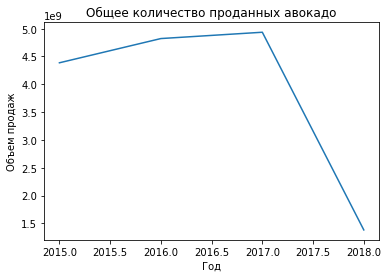

In [27]:
Total_Volume = df[[x for x in df.columns if 'Volume' in x] + ['year']].groupby('year').sum()
# Total_Volume

plt.plot(Total_Volume.index, Total_Volume.Total_Volume)
plt.title('Общее количество проданных авокадо')
plt.xlabel('Год')
plt.ylabel('Объем продаж')
# plt.legend(dynamics_by_region)

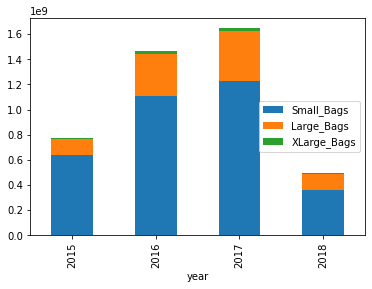

In [26]:
ax = AveragePrice.drop('Total_Bags', axis=1).plot(kind='bar', stacked=True)
# ax.legend(loc='upper right')

Из данного графика можно сделать вывод, что в период с 2015 по 2017 гг повышался уровень закупок авокадо.
Причем преобладающее количество закупок было сделано малыми упаковками, что говорит скорее всего о том, что основными
заказчиками являются организации с небольшим сбытом (скорее всего - это небольшие организации). За ними идут закупки
большими упаковками и совсем небольшим колличеством - очень большими упаковками.
Но с 2017 по 2018 гг видно резкое снижение в количестве закупок. Это может говорить о том, что, возможно, тот тренд в
моде по употреблению авокадо, который был ранее изжил себя, пришли новые тренды и люди перешли к покупкам других продуктов.
Или тому виной плохой урожай 2018 года.
Из-за малого количеста годов в выборке нельзя сказать о прогнозе, но предположу, что если в 2019 году нет проблем с урожайностью,
то скорее всего будет увеличено количество закупок по авокадо, т.к. за отчетный период преобладал больший интерес к 
этому продукту, а 2018 году наблюдался временный спад.

### Пример по уровню счастья в странах

In [24]:
df_happy = pd.read_csv('Happines2019.csv')
df_happy.rename(columns={'Country or region': 'Country_or_region',
                         'Social support': 'Social_support',
                         'GDP per capita': 'GDP_per_capita',
                         'Healthy life expectancy': 'Healthy_life_expectancy', 
                         'Perceptions of corruption': 'Perceptions_of_corruption',
                         'Freedom to make life choices': 'Freedom_choices'}, inplace=True)
pd.options.display.float_format = '{:,.3f}'.format
# df_happy.head()
# df_happy.info()
# пример сбора данных для построения графика matplotlib
# happiness = df_happy.groupby('Country_or_region')[['Score', 'Social_support', 'Perceptions_of_corruption']].sum().sort_values('Score', ascending=False)
# happiness = df_happy[[x for x in df_happy.columns if 'Score' in x] + ['Country_or_region']].\
#             groupby('Country_or_region').sum().sort_values('Score', ascending=False)
# happiness

Text(0.5, 1.0, 'Распределение баллов по уровню счастья в странах')

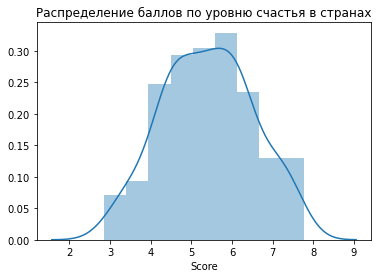

In [25]:
ax = sns.distplot(df_happy.Score)
ax.set_title('Распределение баллов по уровню счастья в странах')

На данной гистограмме мы видим распределение баллов по уровню счастья различных стран. Основное количество стран находится в диапазонах 4-6.5 баллов, что говорит о среднем типе удовлетворенности граждан по выбранным государствам. Также хочется отметить то, что кол-во стран с уровнем удовлетворенности выше среднего больше, чем с уровнем ниже среднего. 
Государства с максимальным уровем удовлетворенности в данной выборке отсутствуют, что говорит о том, что есть потенциал улучшения для всех.

In [118]:
# sns.jointplot(x='Score', y='Social_support', 
#               data=df_happy, kind='scatter')
# sns.jointplot(x='Score', y='GDP_per_capita', 
#               data=df_happy, kind='scatter')
# sns.jointplot(x='Score', y='Healthy_life_expectancy', 
#               data=df_happy, kind='scatter')
# sns.jointplot(x='Score', y='Perceptions_of_corruption', 
#               data=df_happy, kind='scatter')

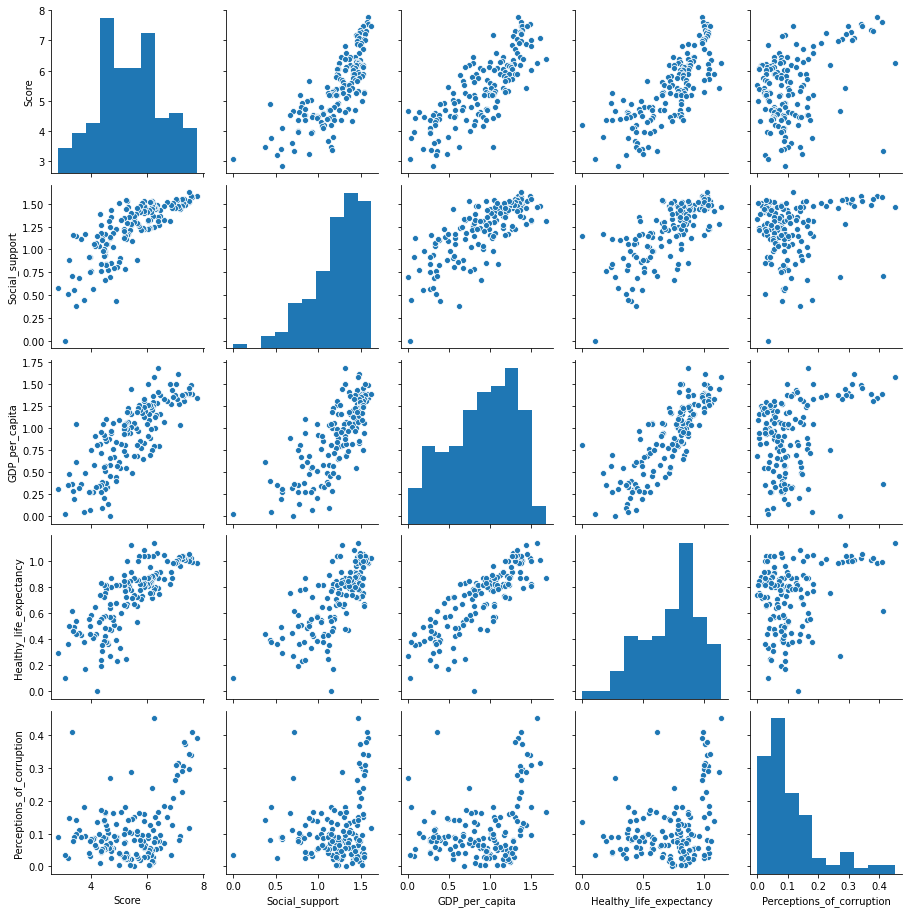

In [119]:
sns.pairplot(df_happy[['Score', 'Social_support', 'GDP_per_capita', 'Healthy_life_expectancy', 'Perceptions_of_corruption']])

Посмотрим более подробно на данные из таблицы, оценим их взаимосвязь между собой.
Можно сделать вывод по наиболее выраженному показателю - общему уровню счастья. Чем выше данный параметр, тем более удовлетворены граждане уровню соц. поддержки, тем выше уровень ВВП на душу населения и тем выше продолжительность жизни.
Оцениваемый уровень коррупции в странах примерно на одном низком уровне, правда видно из графиков, что она оценивается более высоко в странах с самым высоким уровнем счастья (есть исключения, но это единичные случаи из стран с меньшим уровнем удовлетворенности граждан). Это говорит о том, что страны в основном оцениваются как более коррумпированые, с малым уровнем коррупции могут только сказать о себе страны с наивысшим уровнем счастья.
Также мы видим, что наибольший удельный вес в оценке уровня счастья в странах оказывают такие два показателя как ВВП на душу населения и уровень соц. поддержки. Уровень коррупции и продолжительность жизни оказывают меньший удельный вес.

In [49]:
google = pd.read_csv('googleplaystore.csv')
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
google_f1 = google.groupby('Category').count().sort_values('App', ascending=False)
google_f1 = google_f1[['App']]
google_f1.head()

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


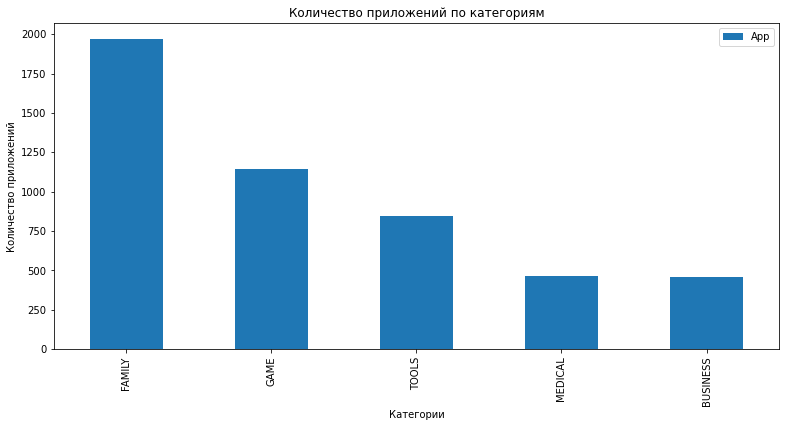

In [47]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

google_f1.loc[['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS']].plot(kind='bar', 
                                                                  title='Количество приложений по категориям',
                                                                  xlabel='Категории',
                                                                  ylabel='Количество приложений')

На данном графике мы видим топ 5 приложений по количеству наименований, доступных на площадке Google Play.
По данных видим их распределение: 
-максимальное количество приложений в категории Family, за ним идет категория Game, Tools, Medical, Business.

In [45]:
google_f2 = google.groupby('Category').sum().sort_values('Rating', ascending=False)
# google_f = google_f[['App', 'Rating']]
google_f2.head()

,Rating
Category,
FAMILY,7323.9
GAME,4702.1
TOOLS,2970.8
PRODUCTIVITY,1478.2
MEDICAL,1466.2


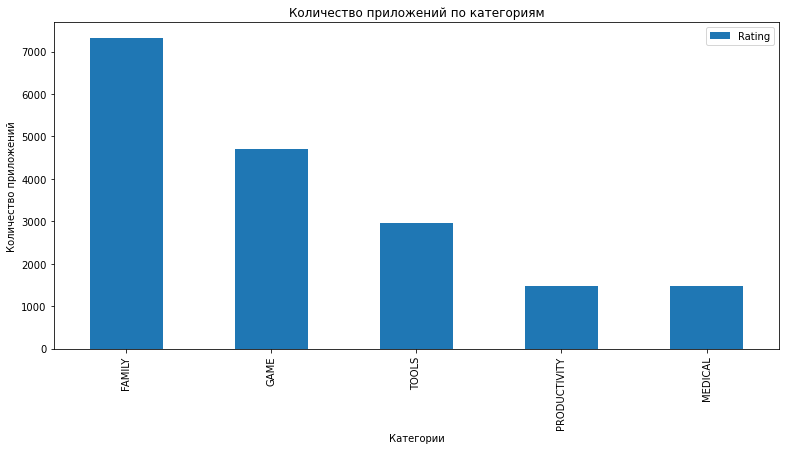

In [46]:
google_f2.loc[['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'MEDICAL']].plot(kind='bar', 
                                                                  title='Количество приложений по категориям',
                                                                  xlabel='Категории',
                                                                  ylabel='Количество приложений')

На данном графике мы видим топ 5 приложений по сумме рейтинга, доступных на площадке Google Play. По данных видим их распределение: -максимальная сумма рейтинга в категории FAMILY, за ним идет категория GAME, TOOLS, PRODUCTIVITY, MEDICAL.
Можно сказать, что здесь наблюдается взаимосвязь количества приложений определенной категории и ее суммарного рейтинга. Данный график можно считать неинформативным, т.к. идет практически полное наследование от предыдущего графика (в помощь категориям приходит их общая сумма рейтинга по количеству).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.